# Visualization with Seaborn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()  # seaborn's method to set its chart style

### Seaborn 플롯 탐색

Seaborn 의 주요 목적은 통계 데이터 탐색과 몇 가지 통계 모델 적합에 유용한 다양한 플롯 유형을 생성할 수 있도록 고차원 명령어를 제공

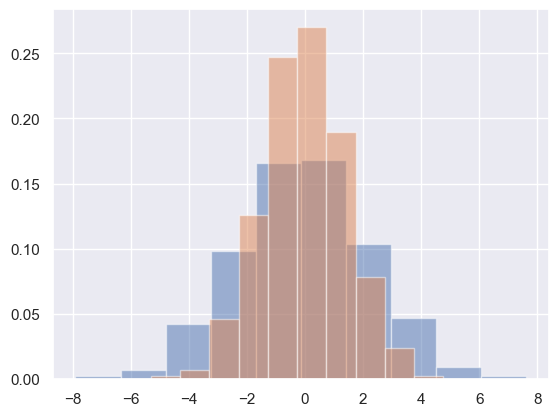

In [2]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

커널밀도추정(kernel density estimation)을 사용하여 분포를 부드럽게 추정할 수 있음

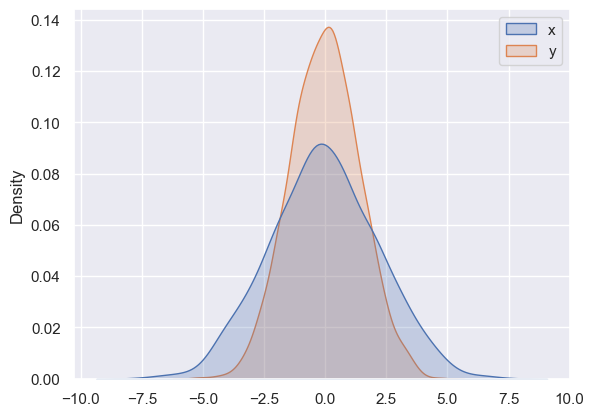

In [4]:
sns.kdeplot(data=data, fill=True); #통계 모델 fitting + plot

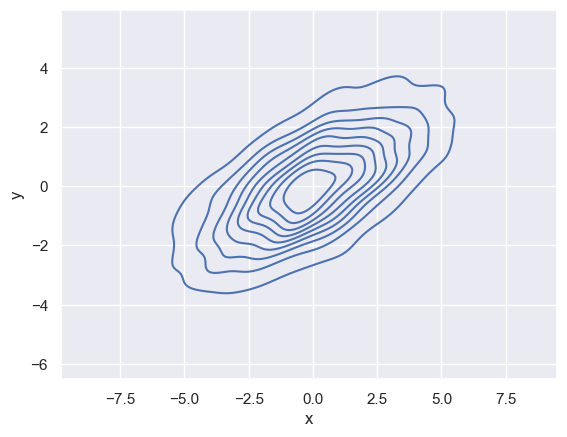

In [5]:
sns.kdeplot(data=data, x='x', y='y');

### Pair Plots

상관관계를 탐색하기에 매우 유용

In [6]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


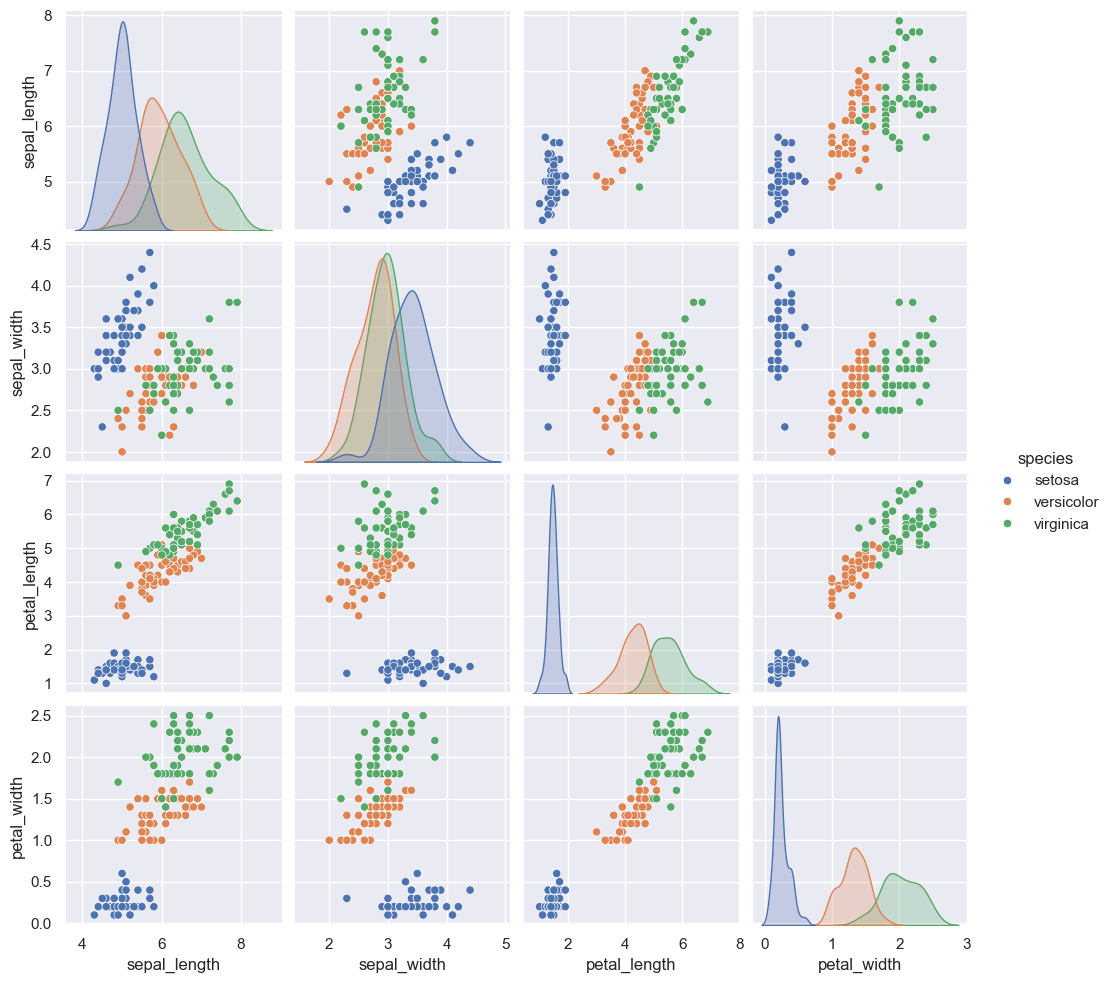

In [7]:
sns.pairplot(iris, hue='species', height=2.5);

### 예제 : 마라톤 완주 시간 탐색

In [ ]:
url = ('https://raw.githubusercontent.com/jakevdp/'
        'marathon-data/master/marathon-data.csv')
!cd data && curl -O {url}
#data 폴더가 있어야함 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  836k  100  836k    0     0  1286k      0 --:--:-- --:--:-- --:--:-- 1291k


In [12]:
data = pd.read_csv('data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


기본적으로 Pandas는 시간 열을 파이썬 문자열 (타입 object)로 적재한다. DataFrame의 dtypes를 보면 이를 확인 가능

In [13]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

시간 데이터 변환기를 제공해 이 문제를 해결해보자

In [14]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


Seaborn플로팅을 목적으로 시간을 초로 제공하는 열을 추가

In [16]:
data['split_sec'] = data['split'].dt.total_seconds()
data['final_sec'] = data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


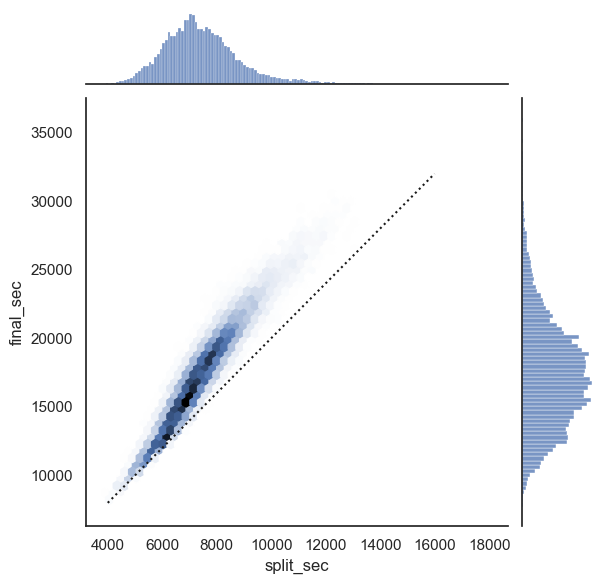

In [17]:
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

데이터의 각 주자가 네거티브 스플릿 주자인지 포지티브 스플릿 주자인지 측정하는 스플릿 정도 열을 만들어보자

In [18]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


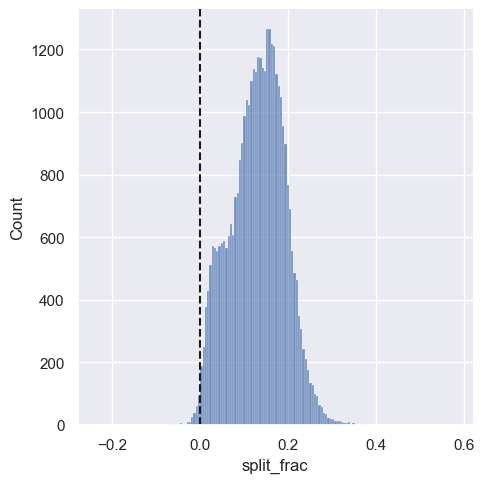

In [19]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--");

**그래프 해석**
- 0 이하 : 전반이 더 빠른 페이스 (네거티브 스플릿 주자)
- 0 : 전반 후반 같은 페이스
- 0 이상 : 후반이 더 느린 페이스 (positive-split 주자)

이 스플릿 정도와 다른 변수들 사이에 상관관계가 있는지 알아보기 위해 pairgrid 사용

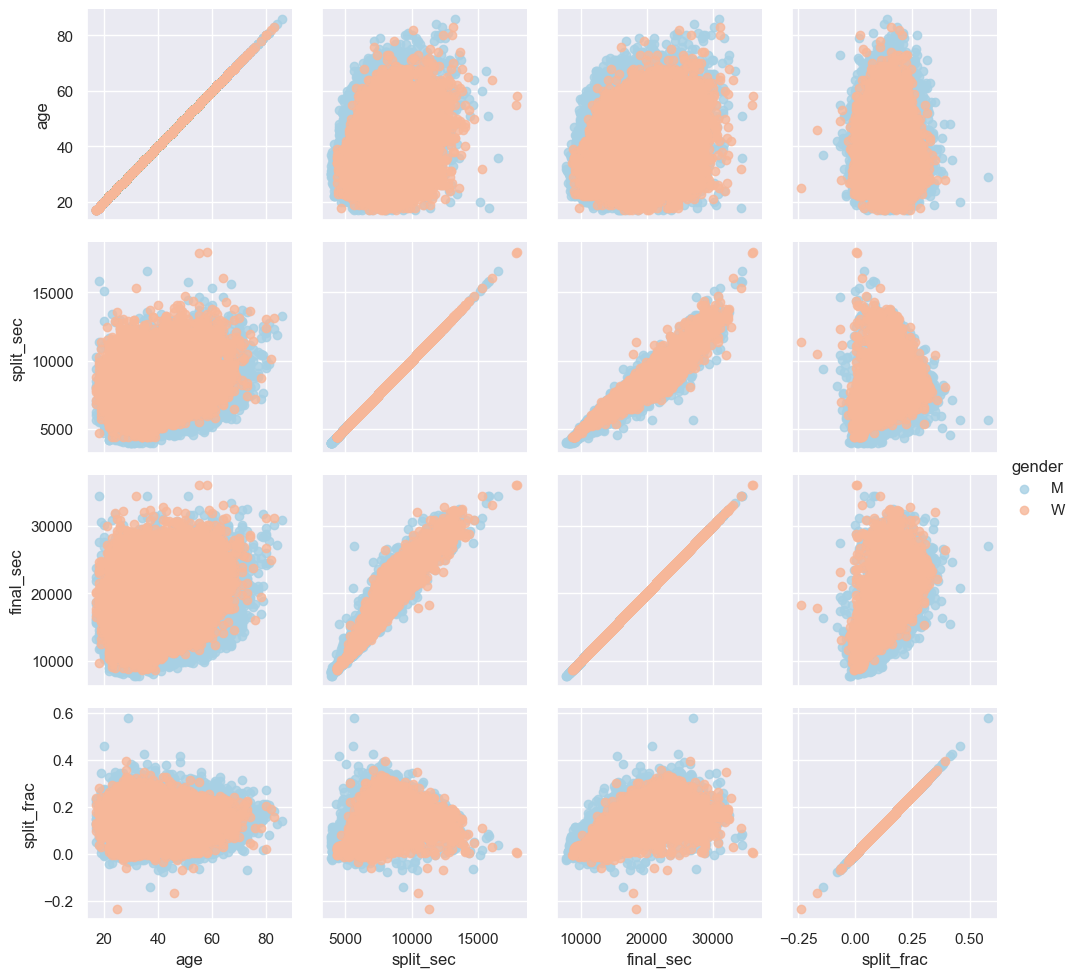

In [20]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

남/여 그룹의 스플릿 정도에 대한 히스토그램

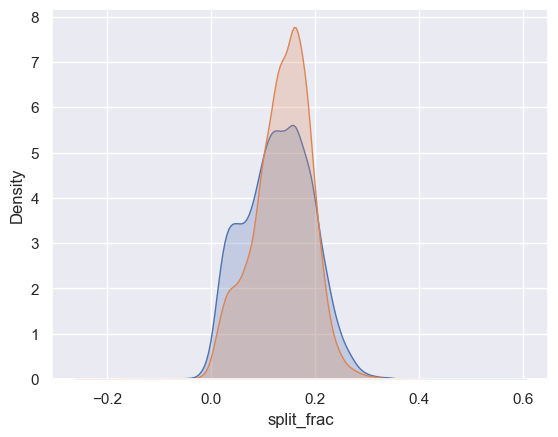

In [21]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', fill=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', fill=True)
plt.xlabel('split_frac');

이븐 스플릿에 가깝게 달린 사람은 여성보다 남성이 훨씬 많음. 

분포 비교에는 바이올린 플롯을 사용하는 것이 좋다.

C:\Users\user\AppData\Local\Temp\ipykernel_16440\2937393740.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="gender", y="split_frac", data=data,


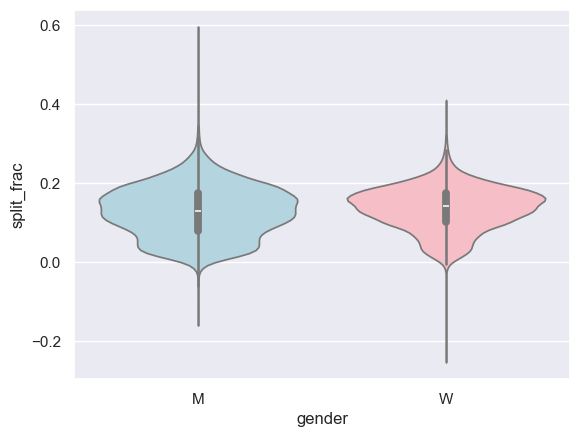

In [22]:
sns.violinplot(x="gender", y="split_frac", data=data,
               palette=["lightblue", "lightpink"]);

나이 함수로 바이올린 플롯을 비교하고자 한다.

먼저 배열에 각 사람의 나이를 10살 단위로 지정하는 새 열을 만든다.

In [23]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


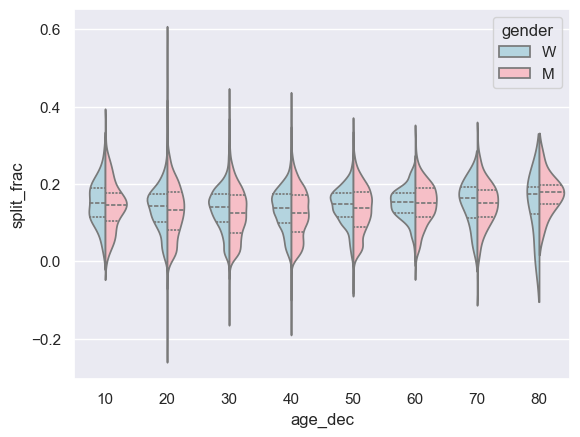

In [24]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

20대와 50대 남성의 스플릿 분포가 같은 연령대의 여성과 비교했을 때 낮은 스플릿에서 밀도가 확연히 높다.

In [25]:
(data.age > 80).sum()

# 80대 여성의 스플릿 시간 면에서 모든 사람을 능가하는 것 처럼 보이는 이유
# 그 범위에 해당하는 주자가 몇 안됨
# 즉, 적은 양의 데이터로 분포를 추정했기 때문

np.int64(7)

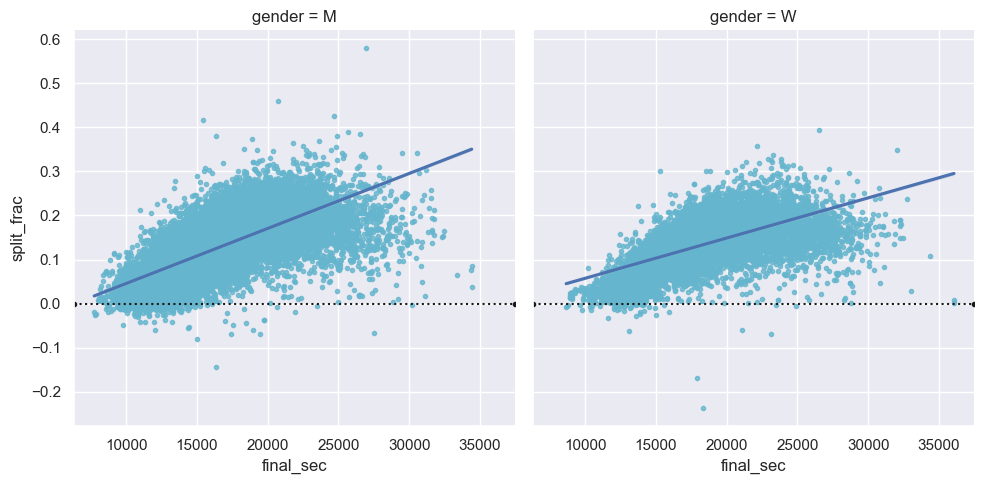

In [ ]:
#p.359
g = sns.lmplot(x='final_sec', y='split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.0, color="k", ls=":");